# Regression Analysis

Regression analysis is a form of predictive modelling technique which investigates the relationship between a dependant and an independant.
variable.

- Numpy is used for data manipulation
- Pandas is used for data processing 
- Matplotlib & Seaborn is used for Data Visulization

In [2]:
import numpy as np   
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading datasets

In [61]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


## Finding a Linear Relation between Head size & Brain weight
### Using Least Square Method
Storing values in variables

In [62]:
x = data['Head Size(cm^3)'].values
y = data['Brain Weight(grams)'].values

## Using the formula $y = mx +c$
Fiznding the variables m & c

In [63]:
# Calculating mean
x_mean = np.mean(x)    # x value
y_mean = np.mean(y)    # y value

# Total values
total = len(x)

Formula 
### $m = \frac {Σ (x - mean_x)(y - mean_y) }{ Σ (x - mean_x)^{2}}$

Applying formula to find m & c values

In [64]:
num = 0
den = 0

for i in range(total):
    num += (x[i] - x_mean) * (y[i] - y_mean)
    den += (x[i] - x_mean)**2

m = num/den

c = y_mean - (m * x_mean)

print("m = {} \nc = {}".format(m,c))

m = 0.26342933948939945 
c = 325.57342104944223


## Plotting Values & Regression Line

<ipython-input-68-f064cb622c05>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


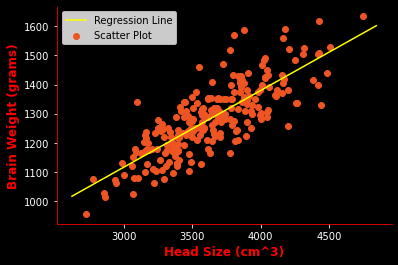

In [68]:
max_x = np.max(x) + 100  # X axis
min_x = np.min(x) - 100  # Y axis

# Calculating Line Values X & Y 
X = np.linspace(min_x, max_x, 1000)
Y = (m * X) + c

plt.figure(facecolor='black')   # Changing Inner background

# Plotting Line 
plt.plot(X, Y, color = 'yellow', label = "Regression Line")

# Plotting points - Scatter Plot
plt.scatter(x, y, color = '#ef5423', label = "Scatter Plot")

# Labling axes
plt.xlabel('Head Size (cm^3)', fontsize = 'large', fontweight = 'bold')
plt.ylabel('Brain Weight (grams)',  fontsize = 'large', fontweight = 'bold')


# Changing color of the graph
ax = plt.axes()                   
ax.set_facecolor("black")                 # Outter background
ax.spines['bottom'].set_color('red')      # Bottom Scale-Line
ax.spines['left'].set_color('red')        # Left Scale-Line
ax.tick_params(axis='x', colors='white')  # Scale Values on X axis
ax.tick_params(axis='y', colors='white')  # Scale Values on Y axis
ax.yaxis.label.set_color('red')           # Lable on Y axis
ax.xaxis.label.set_color('red')           # Lable on X axis

plt.legend()
plt.show()

## Calculating $R^{2}$
### $R^{2}= 1-\frac{Σ(pred_y - mean_y)^{2}}{Σ(y - mean_y)^{2}}$

In [69]:
numerator = 0
denomenator = 0

for i in range(total):
    y_pred = (m * x[i]) + c
    denomenator += (y[i] - y_mean)**2
    numerator += (y[i] - y_pred)**2

r2 = 1 - (numerator/denomenator)
print(r2)

0.6393117199570003


The Value obtained of $R^{2}$ is < 1. \
Therefore it is a good model.

## Using Scikit-Learn

This library is mostly used for Supervised Learning Algorithms. \
It allows us to create models like :
- Classification
- Regression 
- Clustering

It is also used for employing techniques to reduce overfitting like 
- K-fold cross validation 
- Putting data on same scale

In [1]:
# scikit learn has many ML algorithms
from sklearn.linear_model import LinearRegression

# this helps to split data for modeling
from sklearn.model_selection import train_test_split